In the first we will import the necessary libraries of python which in this case pydicom and matplotlib, we will also load the file we want to utilize

In [13]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# Load the DICOM
#dcm = pydicom.dcmread('flair.dcm')
dcm = pydicom.dcmread('t1.dcm')

Now we will load the image from contents of file

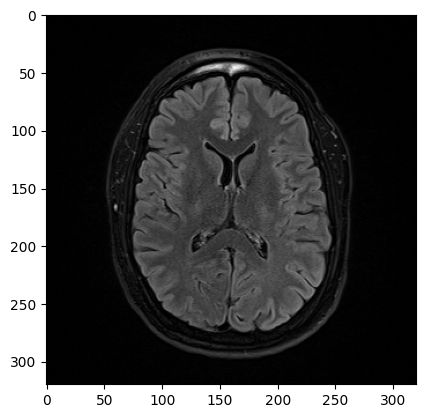

In [9]:
# Get the image data and display it
img = dcm.pixel_array
plt.imshow(img, cmap='gray')
plt.show()

Now we will draw a white square on it and display it again

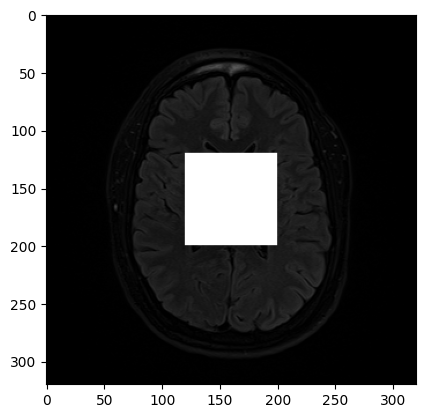

In [14]:
# Determine the dimensions of the image
height, width = img.shape

high_bit= dcm[0x00280102].value

# Determine the dimensions of the square
square_size = min(height, width) // 4

# Determine the coordinates of the center of the image
center_x, center_y = (width-square_size) // 2, (height-square_size) // 2
square= np.ones((square_size,square_size))*(2**high_bit)

# Draw the square on the new image
img[center_y:center_y+square_size, center_x:center_x+square_size] = square

plt.imshow(img, cmap=plt.cm.gray)
plt.show()

Now we will load the information of the patient and then display it

In [10]:
# Get the patient information
patient_name = dcm.PatientName
patient_id = dcm.PatientID
patient_sex = dcm.PatientSex

# Print the patient information
print('Patient Name:', patient_name)
print('Patient ID:', patient_id)
print('Patient Sex:', patient_sex)

Patient Name: t1
Patient ID: t1
Patient Sex: O


After that, we will update the name of the patient and then save it in a new file

In [15]:
# Change the patient name
dcm.PatientName = 'ubaid'
dcm.PixelData = img.tobytes()

# Save the modified DICOM file
#dcm.save_as('flair_new.dcm')
dcm.save_as('t1_modified.dcm')